In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# KNN - 1

In [2]:
#raw_data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\MLAssignments\Dataset\ObesityDataSet_Lect1.csv")
raw_data = pd.read_csv(r"E:\Nextstep\Scaler\MLAssignments\MLAssignments\Dataset\ObesityDataSet_Lect1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Nextstep\\Scaler\\MLAssignments\\MLAssignments\\Dataset\\ObesityDataSet_Lect1.csv'

In [ ]:
raw_data.head()

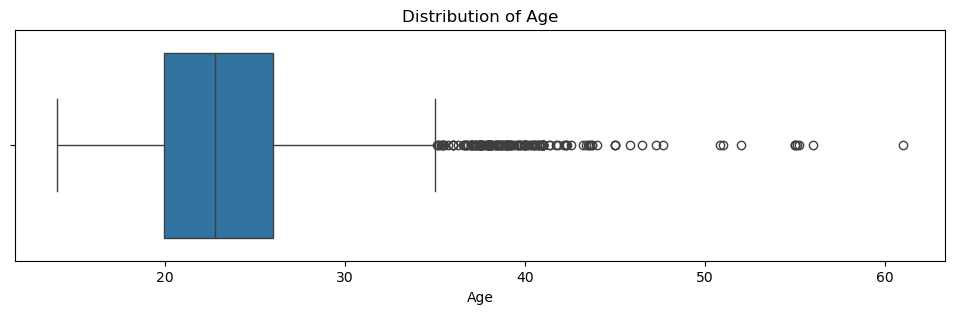

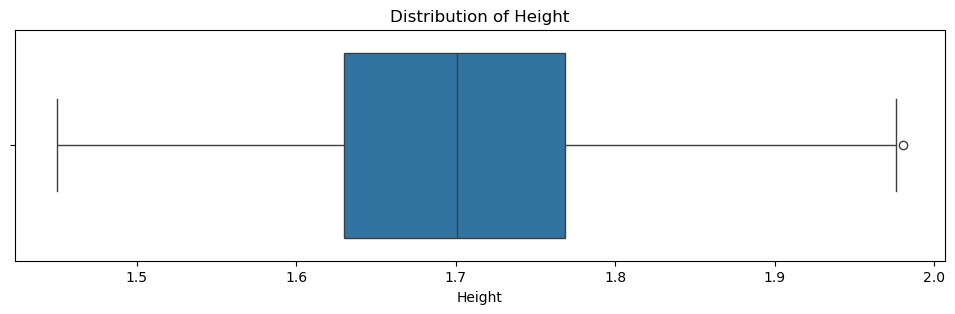

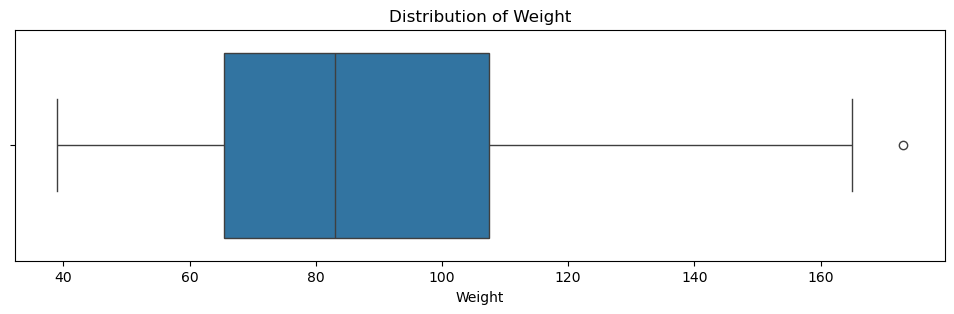

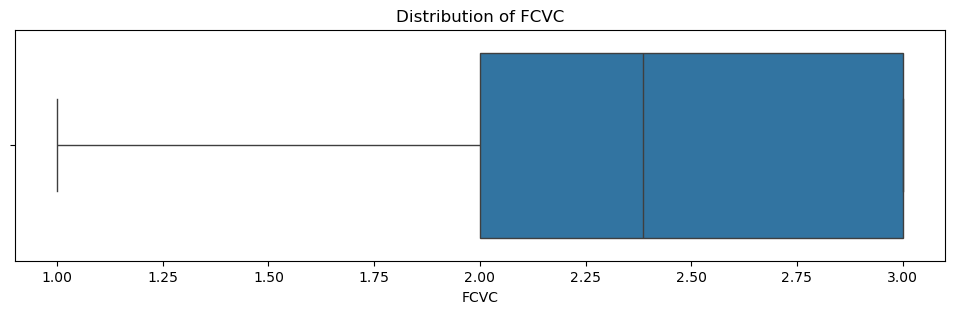

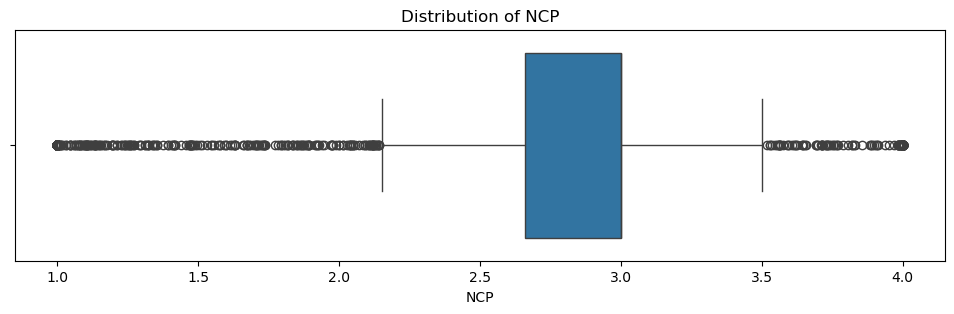

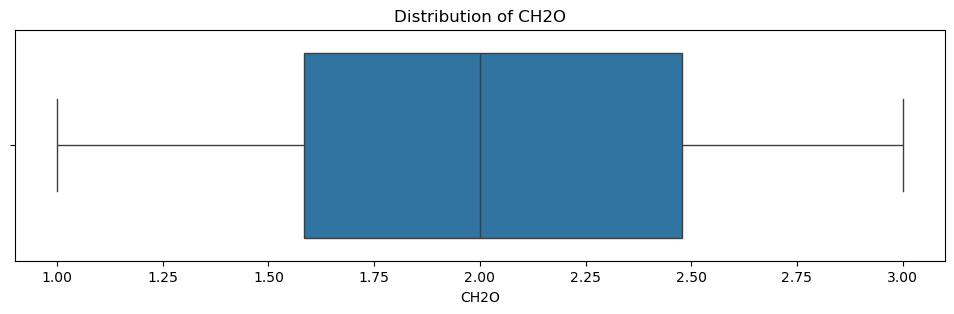

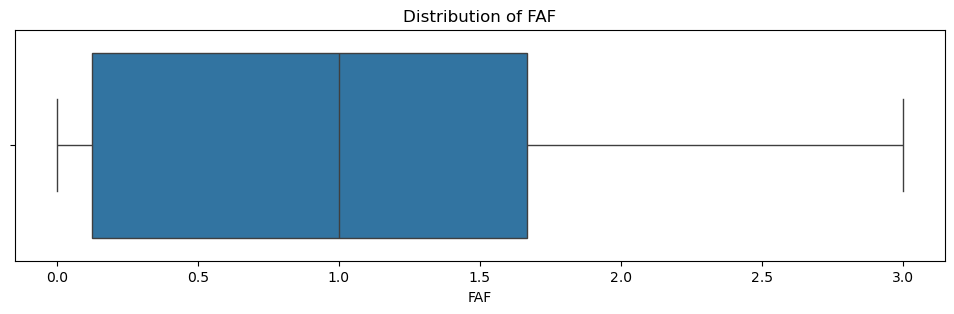

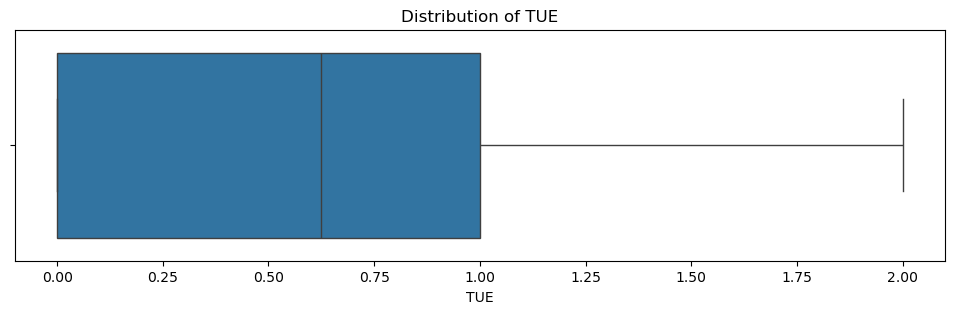

In [4]:
# Assignment: 6
num_features = list(raw_data.describe().columns)
for feature in num_features:
    plt.figure(figsize=(12,3))
    sns.boxplot(raw_data, x=feature)
    plt.title("Distribution of " + str(feature))

In [ ]:
# Assignment: 7
df = raw_data[['FCVC', 'FAF']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
euclidean_distances([df_scaled[0]], [df_scaled[-1]])

In [ ]:
# Assignment: 8
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)  # Hint: Final distance formula calculation step

In [ ]:
# Function to predict the label of a new data point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])  # Hint: Calculate distance
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in distances[:num_neighbors]]  # Hint: Neighbors selection

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)  # Hint: Determine majority

    return prediction

In [ ]:
# Encoding the 'Gender' column
original_df = raw_data
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])  # Hint: Fit and apply encoding

# Scaling the features

scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New data point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])

# Encoding and scaling the new data point
new_data_df['Gender'] = label_encoder.transform(new_data_df['Gender'])  # Hint: Apply existing encoding
new_data_scaled = scaler.transform(new_data_df[['Age', 'Height', 'Weight']])  # Hint: Apply existing scaling

new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the label
predicted_label = predict_label(original_df, new_data_point, 5)
print(f"The predicted label is: {predicted_label}")

# Lecture 2

In [ ]:
#Assignment 2

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [19]:
cat_cols = [col for col in list(raw_data.columns) if raw_data[col].dtype == 'O']
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [20]:
df = raw_data.copy()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [21]:
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.33, random_state=42)
xtrain.shape, xtest.shape

((1414, 16), (697, 16))

In [24]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [14]:
model = KNeighborsClassifier()
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.8741159830268741 0.8005738880918221


In [ ]:
model.score(xtrain_scaled, ytrain)

In [16]:
#assignment 4
train_acc = []
test_acc = []
for k in range(1,81):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain_scaled, ytrain)
    train_acc.append(model.score(xtrain_scaled, ytrain))
    test_acc.append(model.score(xtest_scaled, ytest))

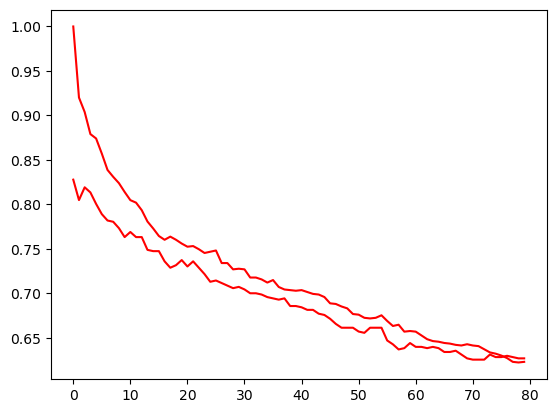

In [17]:
plt.plot(train_acc, label='Train', color = 'r')
plt.plot(test_acc, label='Train', color = 'r')

In [26]:
#Assignment 3
model = KNeighborsClassifier(metric='euclidean')
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.8741159830268741 0.8005738880918221


In [27]:
model = KNeighborsClassifier(metric='manhattan')
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.9052333804809052 0.8622668579626973


In [28]:
model = KNeighborsClassifier(metric='cosine')
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.8727015558698727 0.8020086083213773


In [30]:
# Assignment 8
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
model = KNeighborsClassifier(n_neighbors)

In [31]:
kf = KFold(5)

In [39]:
score_list = []
for k in range(11,2,-1):
    score_list.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), xtrain_scaled, ytrain, cv=kf)))

In [40]:
score_list

[0.7411948976267448,
 0.7461444001704132,
 0.7503972132421122,
 0.7539307821467058,
 0.7645314888604867,
 0.7673558379069243,
 0.7779615567751799,
 0.7850462371250282,
 0.7935217903415783]

In [47]:
mean_score = []
for k in range(2,11):
    model_score = []
    for i, (train_index, val_index) in enumerate(kf.split(xtrain_scaled)):
        x_train = xtrain_scaled[train_index]
        x_val = xtrain_scaled[val_index]
        y_train = ytrain[train_index]
        y_val = ytrain[val_index]
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        model_score.append(model.score(x_val, y_val))
    mean_score.append(np.mean(model_score))

In [48]:
mean_score

[0.8112021652507331,
 0.7935217903415783,
 0.7850462371250282,
 0.7779615567751799,
 0.7673558379069243,
 0.7645314888604867,
 0.7539307821467058,
 0.7503972132421122,
 0.7461444001704132]

In [54]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.9038189533239038 0.8192252510760402


# Decision Tree 1

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\MLAssignments\Dataset\SteelPlant.csv")
data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
# Assignment 2
Target = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']   

In [6]:
def assign(df):
    for col in Target:
        if df[col] == 1:
            return col
    return np.nan

In [7]:
data['Target'] = data[Target].apply(assign, axis=1)

In [8]:
data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [57]:
prob_df = data['Target1'].dropna().value_counts()/len(data.dropna())

In [60]:
ent = 0
for col in Target:
    p = prob_df.loc[col]
    ent += p * np.log2(p)
ent

-2.403652706897658

In [9]:
data['Target1'] = data[Target].idxmax(axis=1)

# Decision Tree 2

In [10]:
df = data.drop(['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults', 'Target','Target1'] , axis=1)

In [11]:
y = data['Target1']

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df, y, random_state=42)

In [14]:
df.to_csv('X.csv')
y.to_csv('Y.csv')

In [16]:
y.head()

0          Stains
1    Other_Faults
2        K_Scatch
3        K_Scatch
4    Other_Faults
Name: Target1, dtype: object

In [83]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=42, class_weight='balanced')

In [85]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [88]:
cm = confusion_matrix(ytest, model.predict(xtest))

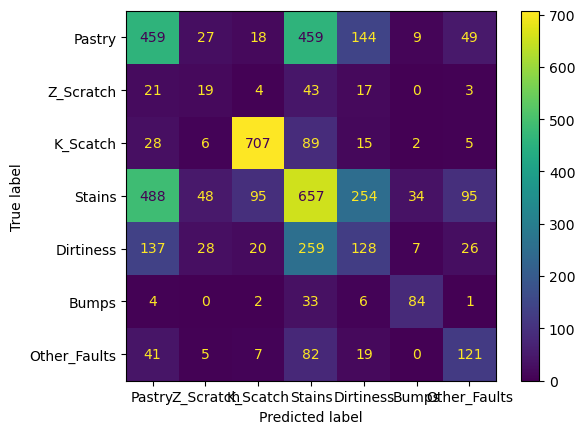

In [97]:
cmd = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=Target)
cmd.plot()

In [98]:
np.diagonal(cm)

array([459,  19, 707, 657, 128,  84, 121], dtype=int64)

In [108]:
(np.sum(cm, axis=1)-np.diagonal(cm))

array([ 706,   88,  145, 1014,  477,   46,  154], dtype=int64)

In [109]:
(np.sum(cm, axis=0)-np.diagonal(cm))

array([719, 114, 146, 965, 455,  52, 179], dtype=int64)

In [106]:
print(classification_report(ytest, model.predict(xtest)))

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1165
   Dirtiness       0.14      0.18      0.16       107
    K_Scatch       0.83      0.83      0.83       852
Other_Faults       0.41      0.39      0.40      1671
      Pastry       0.22      0.21      0.22       605
      Stains       0.62      0.65      0.63       130
   Z_Scratch       0.40      0.44      0.42       275

    accuracy                           0.45      4805
   macro avg       0.43      0.44      0.44      4805
weighted avg       0.45      0.45      0.45      4805



In [137]:
# Assignment 5
from sklearn.model_selection import KFold, cross_validate
kf = KFold(10, random_state=42, shuffle=True)
depths = [3, 5, 7, 11, 13, 15, 19, 20]
cv_train_score = []
cv_test_score = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
    cv_res = cross_validate(model, xtrain, ytrain, cv=kf, scoring='accuracy')
    cv_test_score.append(cv_res['test_score'].mean())
    #cv_train_score.append(cv_res['train_score'].mean())

In [115]:
cv_res

{'fit_time': array([0.08607769, 0.0791316 , 0.08207345, 0.07913065, 0.0800879 ,
        0.07813311, 0.08112025, 0.08211756, 0.08007193, 0.0810914 ]),
 'score_time': array([0.00404453, 0.00398874, 0.00404739, 0.00398874, 0.00398731,
        0.00394154, 0.00400376, 0.00400257, 0.00400496, 0.00402927]),
 'test_score': array([0.51664355, 0.50208044, 0.47434119, 0.4778086 , 0.46773074,
        0.48646773, 0.52532963, 0.49479528, 0.51561416, 0.48507981])}

In [140]:
depths[np.argmax(cv_test_score)]

5

In [141]:
best_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
best_model.fit(xtrain, ytrain)
print(f"The model accuracy on testing data with best depth is {best_model.score(xtest, ytest)}")

The model accuracy on testing data with best depth is 0.495525494276795


In [129]:
fi_list = best_model.feature_importances_
cols = list(xtrain.columns)

In [130]:
fi = [(cols[i], fi_list[i]) for i in range(len(cols))]

In [136]:
sorted(fi, key=lambda x: x[1])[-3:]

[('Length_of_Conveyer', 0.12535167213763224),
 ('Pixels_Areas', 0.2948597846256839),
 ('Outside_X_Index', 0.31979749627357207)]

# Bagging and Random Forest

In [142]:
data['Target1'].value_counts()

Other_Faults    6540
Bumps           4761
K_Scatch        3431
Pastry          2284
Z_Scratch       1150
Stains           568
Dirtiness        485
Name: Target1, dtype: int64

In [22]:
# Assignment 5
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=42)
grid_res = RandomizedSearchCV(model, params, cv = 2, scoring='accuracy', n_iter=30, random_state=42)

In [26]:
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [27]:
print(grid_res.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}


In [30]:
## Additional Problem
import numpy as np
dataset = [5, 8, 9, 5, 0, 0, 1, 7, 6, 9, 2, 4, 5, 2, 4, 2, 4, 7, 7, 9]#eval(input())
dataset = np.asarray(dataset)

#It returns the mean of numbers list
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#printing the mean of the dataset
print('True Mean: %.3f' % mean(dataset))

#It returns a 2d list consisting of the observations from the dataset representing the subsamples used in bootstrap sampling
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = round(len(dataset) * ratio, 0) #number of observations to draw from the dataset for the subsample according to dataset and ratio. It should be the rounded off integer.
    while len(sample) < n_sample:
        index = np.random.randint(len(dataset)-1)  #pick a random index of observation from the dataset
        sample.append(dataset[index]) #append the observation to the list sample
    return sample
    
np.random.seed(1)

#ratio of the dataset we will be using to create to bootstrap samples
ratio = 0.10

for n_bootstrap in [100]:
    sample_means = list() #list consisting of the mean of the bootstrap samples
    for i in range(n_bootstrap):
        sample = subsample(dataset, ratio) #draw a sample from the dataset
        sample_mean = np.mean(sample)    #find the mean of the sample
        sample_means.append(sample_mean)

    #printing the means of each bootstrap sample	
    print('Samples=%d, Estimated Mean: %.3f' % (n_bootstrap, mean(sample_means)))

True Mean: 4.800
Samples=1, Estimated Mean: 2.000
Samples=10, Estimated Mean: 4.450
Samples=100, Estimated Mean: 4.620


In [44]:
## Additional Problem
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

a = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
b = ['c', 'b', 'c', 'c', 'b', 'c', 'a', 'a', 'a', 'b']
c = [0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
d = [1, 1, 0, 1, 1]
e = ['a', 'c', 'b', 'a', 'b']

train = pd.DataFrame({'attr1': a, 'attr2': b, 'tar': c})
test = pd.DataFrame({'attr1': d, 'attr2': e})

#returns a dataframe where the values in 'attr2' are replaced with 'l':0, 'm':1, 'h':2
def str_column_to_int(dataset, column):
    #all the unique values in the the attr2
    unique = sorted(pd.unique(dataset['attr2']))

    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i

#replace the values in attr2
    print(lookup)
    dataset[column] = dataset[column].map(lookup)
    return dataset

train = str_column_to_int(train, 'attr2')
test = str_column_to_int(test, 'attr2')

#initialize the classifier
tree = DecisionTreeClassifier()

#fit the model with the attributes and target of the training data
tree.fit(train.drop(['tar'], axis=1), train['tar'])

#predict the target for the observations in the test
pred=tree.predict(test)

print(pred)

{'a': 0, 'b': 1, 'c': 2}
{'a': 0, 'b': 1, 'c': 2}
[1 1 0 1 0]


In [43]:
train.head()

,attr1,attr2,tar
0,0,2,0
1,0,1,0
2,1,2,1
3,1,2,1
4,1,1,1


In [52]:
## Additional Problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(0)

# X_train = eval(input())
# Y_train = eval(input())
# X_valid = eval(input())
# Y_valid = eval(input())

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]

#initialize the max_accuracy 
max_accuracy = 0

#2d list
hyperparameters = []    
#add all the possible combinations of the hyperparameters, each combination as a list
#YOUR CODE GOES HERE
for est in n_estimators:
    for depth in max_depth:
        hyperparameters.append([est, depth])


#YOUR CODE ENDS HERE

# #iterate through all the possible combinations
for k in range(len(hyperparameters)) :

    #equate the hyperparameters
    model = RandomForestClassifier(n_estimators=hyperparameters[k][0], max_depth=hyperparameters[k][1])
  
    model.fit( X_train, Y_train )
    
    # Prediction on validation set
    Y_pred = model.predict( X_valid )
    #calculate the accuracy of y_pred
    curr_accuracy = accuracy_score(Y_pred, Y_valid)
    
    #update the max_accuracy
    if max_accuracy < curr_accuracy :            
        max_accuracy = curr_accuracy

print(np.round(max_accuracy, 2))

1.0


In [46]:
X_train = [[-1.3866988473336963, -1.4659283769652018, 0.21908962542114993, -0.5705832721154885, -0.39026284294183144], [-0.7420732896222481, -0.08018384934842993, 3.289428542039212, -0.2964031797183057, -1.125040628296576], [0.21851716927727832, 1.0189924747916534, -0.7926306280393199, -0.2962365155662698, 0.9186990330562381], [0.3301766397890254, -0.16234277642612435, 0.7791050210600118, -0.2789394183794175, -0.35256672506010045], [-0.5564673667894178, 0.5994216521345357, 0.40496709263900627, 0.13789108254811427, -1.6797693374581222], [-0.4720940445492414, 0.7586066378374584, 0.11238256186733482, -0.04938846752263362, 0.9002597707743003], [0.6349076398170301, 0.1836763524015007, 1.1110767907487034, 0.45180245509492484, -0.4783224076406436], [-1.283707351437791, 0.6660298150052364, 1.5696565285122108, -0.6888351361949948, -0.8067418148384723], [1.4486773262255297, 1.1533634571229343, 0.25142391222574634, 0.2030471272777417, -0.9163693858589892], [0.2348414093321201, -0.9172108964271672, 0.9729754272245916, 1.3780385868308136, -0.09055892098596163], [0.6354361842373741, -0.8190222254833313, -0.00038109394560143146, -0.4358096089529283, -1.0552640440044254], [0.39286286277430754, 1.1227932444987576, -0.4560006105768751, 1.540942085589407, 0.8198553203534422], [-0.015930330301621193, 0.1549232280701, -1.4180291585154143, -2.1379838467838814, 1.220286714782214], [-0.19670287799839387, -0.49256946476607977, 0.3263897035897652, 0.742732407535864, 1.0944787425334823], [-0.2585046029453902, 0.15014998302969798, -0.45023021276200786, 0.4195424096764816, 1.0271758933897448]]
Y_train = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
X_valid = [[-1.0242005313937477, 0.976281826209692, -0.08920283415553125, 1.3788073908145468, -1.910582206697658], [-0.5261119238131993, -0.3443793123408228, -0.27647010369805974, -0.922859596433698, 1.1023500179176688], [-1.3564905359324015, -0.8475433541986344, 0.18234188313329097, -0.6098825928188724, 1.16813242929799], [1.5023509595263478, 0.25117399808101465, 1.4985390708977253, -1.0426432774270358, 1.3538360431859358], [-2.124074148585913, 1.9821906863146135, 1.2206529386813578, -0.5057455727664389, -0.9943646677180753], [0.008449083666056009, -0.916539897668125, -1.4137008074570467, 1.6437768066205727, 1.0730437206988162], [0.692291104684553, 0.8290740382224973, -0.8614162963750803, -0.5663186573498192, 0.9446455766399413], [1.1510791022492721, -1.2216360043806689, -1.6227635183877651, -1.9345051157994586, -0.5498461748799024], [-0.7861882343032912, 0.8254785094597348, 0.06800567662367255, -0.7727384191587424, 0.87627995234417], [0.4207745468774598, -0.8274281056562529, -0.03974762336921463, -0.0005562277737053338, 0.8612479876410026]]
Y_valid = [0, 1, 1, 1, 0, 1, 1, 0, 1, 1]

# Boosting 1

In [97]:
data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\MLAssignments\Dataset\booking.csv")
data.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


- id: Unique identifier for each booking.
- no_of_adults: Number of adults per booking.
- no_of_children: Number of children per booking.
- no_of_weekend_nights: Number of weekend nights booked.
- no_of_week_nights: Number of weekday nights booked.
- type_of_meal_plan: Type of meal plan selected (e.g., bed and breakfast, all-inclusive).
- required_car_parking_space: Indicates if a parking space was required.
- room_type_reserved: Type of room reserved.
- lead_time: Number of days between the booking date and the arrival date.
- arrival_year, arrival_month, arrival_date: Date details for when the booking is scheduled.
- market_segment_type: The market segment from which the booking originated.
- repeated_guest: Flag indicating if the guest has booked before.
- no_of_previous_cancellations: Number of prior cancellations by the guest.
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the guest.
- avg_price_per_room: Average price per room type.
- no_of_special_requests: Number of special requests made by the guest.
- booking_status: Status of the booking ( confirmed = 0, canceled = 1).

In [59]:
# Assignment 1
data[data[['no_of_adults', 'no_of_children']].sum(axis=1) == 0]['id'].count()

16

In [60]:
# Assignment 2
data['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

<Axes: xlabel='arrival_month', ylabel='count'>

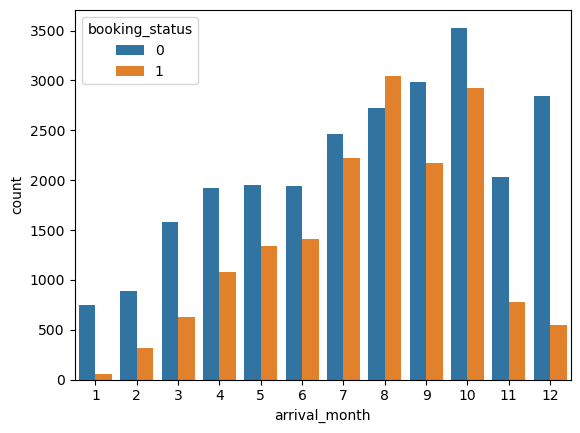

In [63]:
sns.countplot(data =data, x='arrival_month', hue='booking_status')

In [68]:
data[data['booking_status'] == 1].groupby('arrival_month')['id'].count().sort_values(ascending=False)

arrival_month
8     3041
10    2923
7     2218
9     2167
6     1411
5     1337
4     1082
11     774
3      624
12     552
2      317
1       58
Name: id, dtype: int64

In [74]:
date_cols = ['arrival_year', 'arrival_month', 'arrival_date']

In [89]:
def process_arrival_date(df, date_cols):
    df['date'] = pd.to_datetime(df[date_cols].apply(lambda x: "-".join(x.astype(str)), axis=1), errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df.drop(['date'], axis=1, inplace=True)
    return df.drop(date_cols, axis=1)

In [90]:
test = process_arrival_date(data, ['arrival_year', 'arrival_month', 'arrival_date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4044\2835022172.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


In [93]:
test.iloc[:,-7:].isnull().sum()

year         50
month        50
day          50
week         50
dayofweek    50
quarter      50
dayofyear    50
dtype: int64

In [ ]:
X = data.drop('booking_status', axis=1)
y = data['booking_status']

In [101]:
#Assignment 5
import numpy as np  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  

# Initialize weights  
weights = np.ones(len(X)) / len(X)  

# Train first weak learner  
dt1 = DecisionTreeClassifier(random_state=10, max_depth=1)  
dt1.fit(X, y)  
y_pred_1 = dt1.predict(X)  

# Update weights function  
def update_weights(y, y_pred, weights):  
    for i in range(len(weights)):  
        if y[i] != y_pred[i]:  
            weights[i] *= 1.5  # Increase the weight for misclassified instances  
        else:  
            weights[i] *= 0.5  # Decrease the weight for correctly classified instances  
    return weights / np.sum(weights)  # Normalize the weights  

# Apply first learner and update weights  
weights = update_weights(y, y_pred_1, weights)  

# Train second weak learner  
dt2 = DecisionTreeClassifier(random_state=10, max_depth=1)  
dt2.fit(X, y, sample_weight= weights)   # Utilize updated weights for learning for this sample_weight is used.
y_pred_2 = dt2.predict(X)  

# Combine the weak learners' predictions  
# Assuming a simple average for combination  
final_prediction = np.round((y_pred_1 + y_pred_2) / 2.0).astype(int)  

# Calculate the accuracy  
final_accuracy = accuracy_score(y, final_prediction)  
print(f"Final combined prediction accuracy: {final_accuracy}")

Final combined prediction accuracy: 0.7140380047505939


In [102]:
#Assignment 7
import numpy as np  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error  

y_pred = np.full(shape=y.shape, fill_value=np.mean(y))  

# Initialize pseudo residuals  
pseudo_residuals = y - y_pred  

learning_rate = 0.1  

# Train first weak learner on pseudo residuals  
dt1 = DecisionTreeRegressor(max_depth=1, random_state=10)  
dt1.fit(X, pseudo_residuals)  
y_pred_1 = dt1.predict(X)  

# Update model predictions  
y_pred += y_pred_1 * learning_rate  

# Calculate new pseudo residuals  
pseudo_residuals = y - y_pred  

# Train second weak learner on new pseudo residuals  
dt2 = DecisionTreeRegressor(max_depth=1, random_state=10)  
dt2.fit(X, pseudo_residuals)  
y_pred_2 = dt2.predict(X)  

# Update model predictions  
y_pred += y_pred_2* learning_rate  

# Calculate the accuracy using the mean squared error as a measure of accuracy for regression  
final_accuracy = 1 - mean_squared_error(y, y_pred)  
print(f"Final model accuracy: {final_accuracy}")

Final model accuracy: 0.7740567736555297
